In [1]:
import cv2
from fer import FER

In [2]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
detector = FER(mtcnn=True)

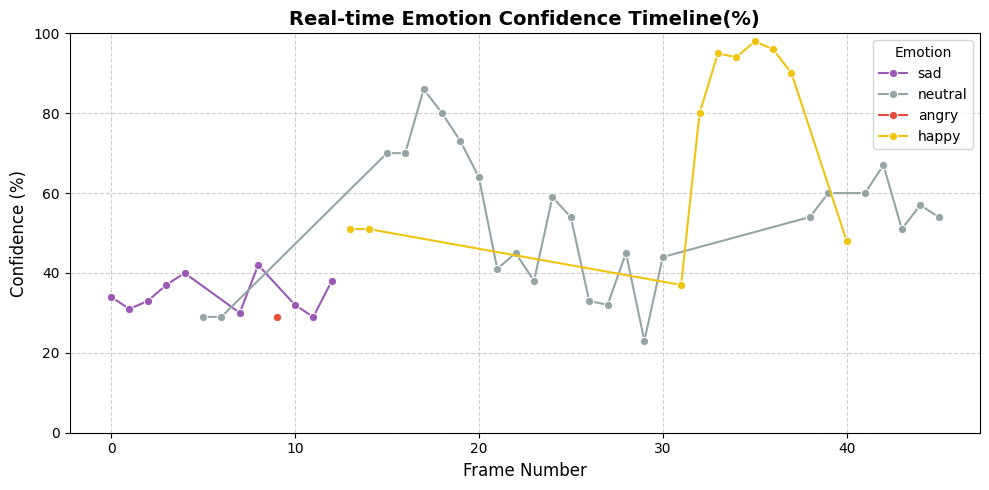

In [4]:
video_cap = cv2.VideoCapture(0)
emotion_counter = Counter()
emotion_sequence=[]
confidence_sequence = []

emotion_colors = {
    "angry": "#E74C3C",      # Red
    "disgust": "#2ECC71",    # Green
    "fear": "#3498DB",       # Blue
    "happy": "#F1C40F",      # Yellow
    "sad": "#9B59B6",        # Purple
    "surprise": "#E67E22",   # Orange
    "neutral": "#95A5A6"     # Gray
}

while True:
    ret, video_data = video_cap.read()
    video_data = cv2.flip(video_data, 1)
    result = detector.detect_emotions(video_data)

    for face in result:
        (x, y, w, h) = face["box"]
        top_emotion = max(face["emotions"], key=face["emotions"].get)
        confidence = face["emotions"][top_emotion]

        emotion_sequence.append(top_emotion)
        confidence_sequence.append(confidence)

        cv2.rectangle(video_data, (x, y), (x + w, y + h), (0, 128, 255), 2)
        cv2.putText(
            video_data,
            f"{top_emotion.capitalize()} ({confidence * 100:.0f}%)",
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.7,
            (255, 255, 255),
            2,
        )

    cv2.imshow("Emotion Detection", video_data)

    if cv2.waitKey(10) == ord("q"):
        break

video_cap.release()
cv2.destroyAllWindows()

if emotion_sequence:
    df = pd.DataFrame({"emotion": emotion_sequence, "confidence": [c * 100 for c in confidence_sequence]})
    df["frame"] = df.index

    plt.figure(figsize=(10, 5))
    sns.lineplot(x="frame", y="confidence", hue="emotion", data=df, palette=emotion_colors, marker='o')
    plt.title("Real-time Emotion Confidence Timeline(%)", fontsize=14, fontweight='bold')
    plt.xlabel("Frame Number", fontsize=12)
    plt.ylabel("Confidence (%)", fontsize=12)
    plt.legend(title="Emotion", fontsize=10)
    plt.ylim(0, 100)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("No emotions detected.")